# SyriaTel Customer Churn Analysis 

## <small> Businness Understanding</small>

### <small> Introduction</small>

### <small>  Problem Statement</small>

### <small> Main Objective</small>

### <small> Subjective Objectives</small>

### <small>  Data Understanding</small>

##  Reading the data

In [49]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations and array manipulation
import matplotlib.pyplot as plt #Data Visualisation
%matplotlib inline
import ydata_profiling # For summary of the data
import warnings
 # Visualize in the notebook

import seaborn as sns # for enhanced visualisation
from sklearn.model_selection import train_test_split #for splitting our data into training and testing sets
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics # For model evaluation and performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\espym.LAPTOP-41F90NSA\projects\Phase_3_project\Tel-Customer-Churn\Data\archive\bigml_59c28831336c6604c800002a.csv")
# Preview the shape of the dataset
print('Dataframe shape {}'.format(df.shape))

Dataframe shape (3333, 21)


# Data Exploration

In [5]:
#  Creating a class for exploring and analyzing Pandas DataFrames.
class DataExplorer:
    def __init__(self, data):
        """
        Initialize the DataExplorer class with a dataset.
        :param data: Pandas DataFrame
        """
        self.data = data
        
    def check_head(self, rows=5):
        """
        Display the first few rows of the dataset.
        :param rows: Number of rows to display (default is 5)
        :return: Pandas DataFrame showing the head of the dataset
        """
        return self.data.head(rows)
    
    def check_info(self):
        """
        Display information about the dataset (data types, memory usage, etc.).
        """
        return self.data.info()
    
    def check_describe(self):
        """
        Generate descriptive statistics of the dataset (count, mean, etc.).
        :return: Pandas DataFrame with descriptive statistics
        """
        return self.data.describe()
    

In [6]:
# Instatiating the class
explorer = DataExplorer(df)

# Check the head of the dataset
print("Head of the dataset:")
print(explorer.check_head())

# Check dataset info
print("\nDataset info:")
explorer.check_info()

# Check dataset description
print("\nDataset statistics:")
print(explorer.check_describe())


Head of the dataset:
  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             

In [7]:
# Summary statistics for categorical columns in DataFrame 'df'
df.describe(include='O')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,340-4627,no,no
freq,106,1,3010,2411


# Data Cleaning

In [8]:
# Checking for null values
pd.DataFrame(df.isnull().sum()).T

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Checking for duplicate Values
df.duplicated().sum()

0

The data has no missing or duplicate values

In [10]:
# Dropping unwanted columns
# We drop the phone number columns as it hold no relevance to this analysis its just a customers number
df.drop(['phone number'], inplace=True, axis=1)

# Explarotary Data Analysis

### Univariate Analysis

The dataset has both numerical and categorical variables and we shall explore them separately

## 1. Categorical Variables

In [11]:
# extract the categorical variables in the dataset
categorical = [ cat for cat in df.columns if df[cat].dtypes=='O']
print('List of categorical variables {}'.format(categorical))

List of categorical variables ['state', 'international plan', 'voice mail plan']


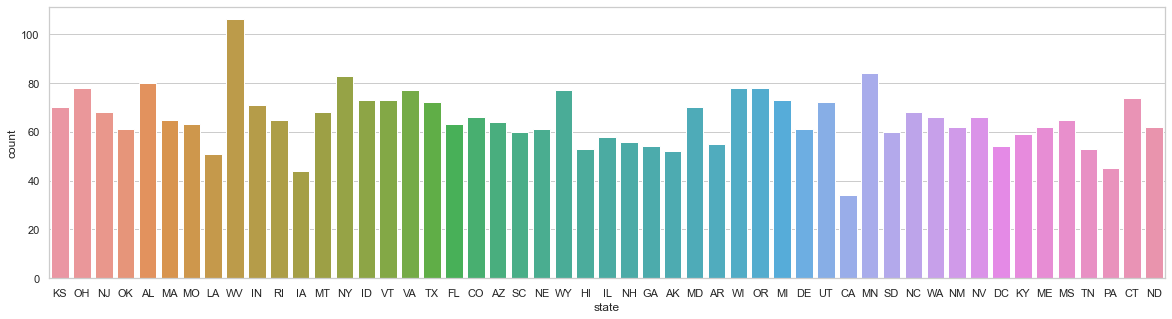

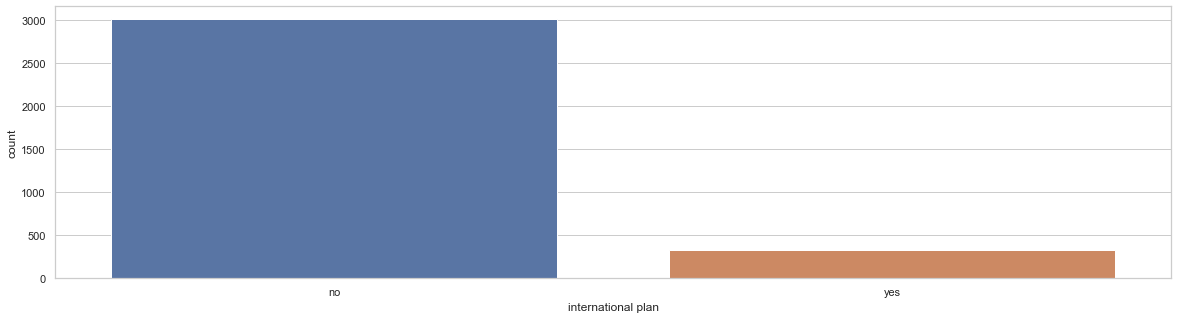

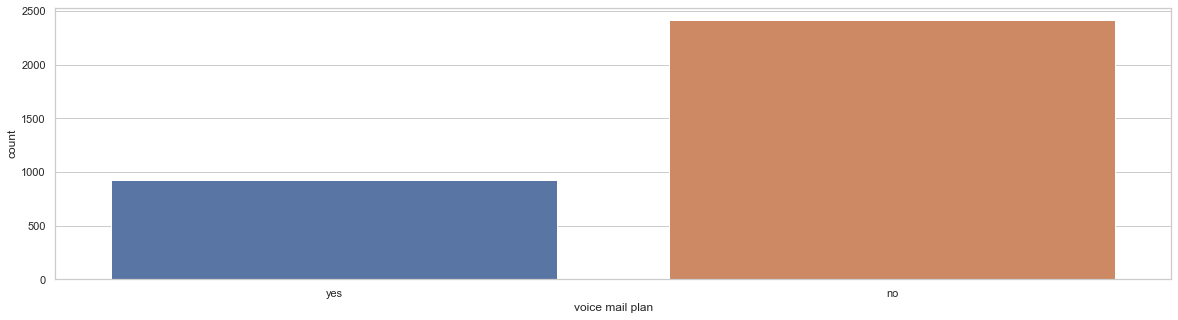

In [12]:
# plotting all the categorical variable 
for feature in categorical:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(df)
    ax = sns.countplot(x = df[feature], data = df)
    plt.show()

False    2850
True      483
Name: churn, dtype: int64


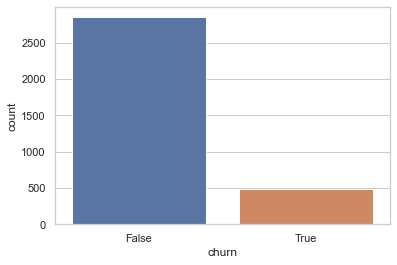

In [13]:
# Plotting the distribution of  the target variable - churn
print(df['churn'].value_counts())
sns.countplot(data=df,x='churn')
plt.show()

## 2. Numerical Variables

In [14]:
# Extracting the numerical variables from the data
# extract the categorical variables in the dataset
categorical = [ cat for cat in df.columns if df[cat].dtypes !='O']
print('List of categorical variables {}'.format(categorical))

List of categorical variables ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


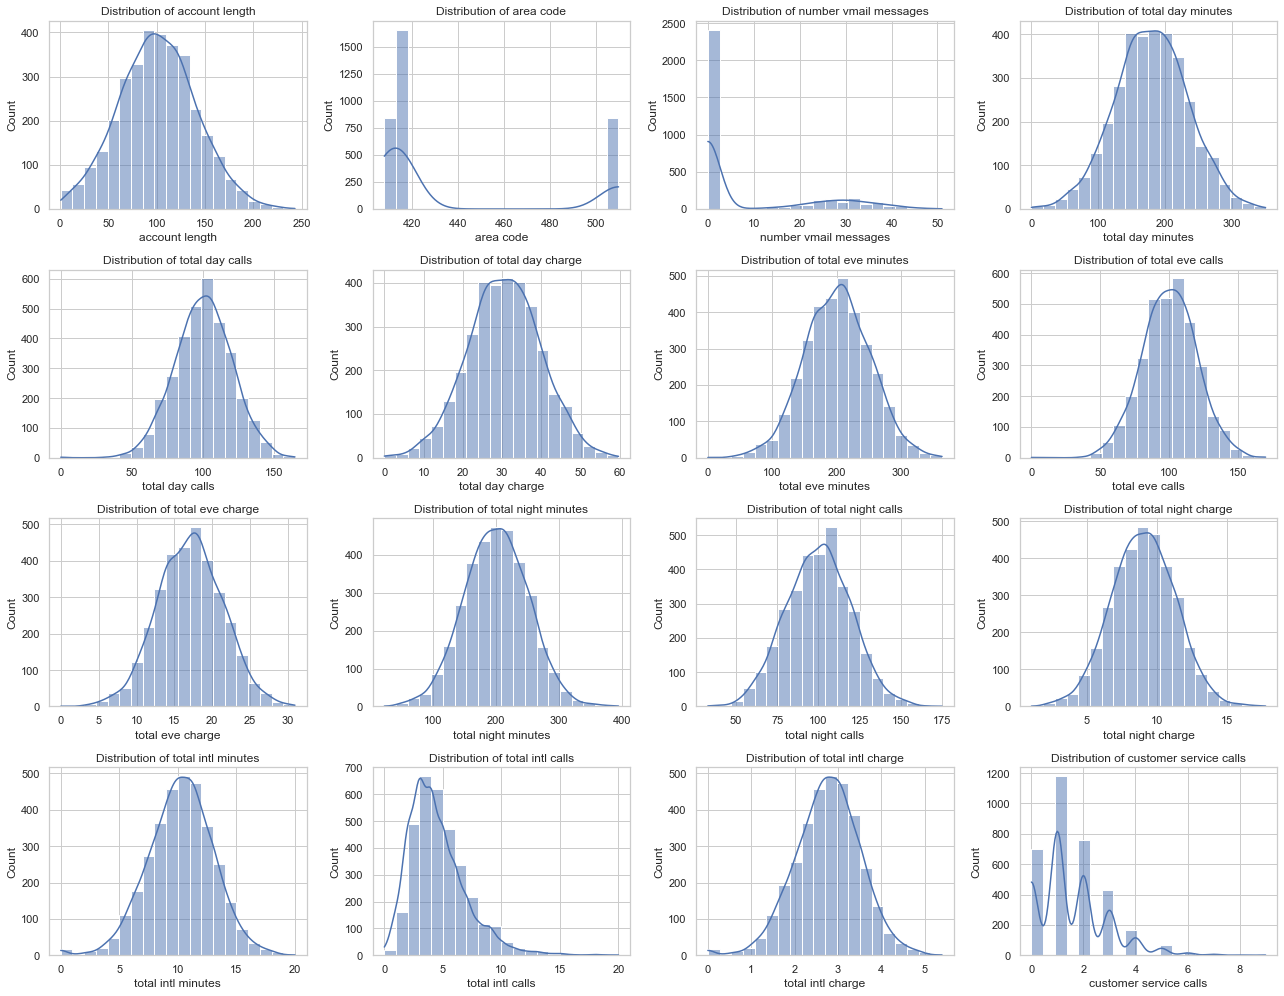

In [15]:
numerical_variables = [
    'account length', 'area code', 'number vmail messages', 'total day minutes',
    'total day calls', 'total day charge', 'total eve minutes', 'total eve calls',
    'total eve charge', 'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls'
]

# Define the number of rows and columns for subplots
rows = 4  # Number of rows for subplots
cols = 4  # Number of columns for subplots

fig, axes = plt.subplots(rows, cols, figsize=(18, 14))
axes = axes.ravel()  # Flatten the 2D array of subplots into a 1D array

for i, column in enumerate(numerical_variables):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Hide empty subplots if the number of variables is less than rows * columns
for i in range(len(numerical_variables), rows * cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

From the above plots it is evident that all but customer service calls,area code and voice mail messages have a normal distribution. Total international calls seems like a normal distribution however skewed to the right.

# BiVariate Analysis

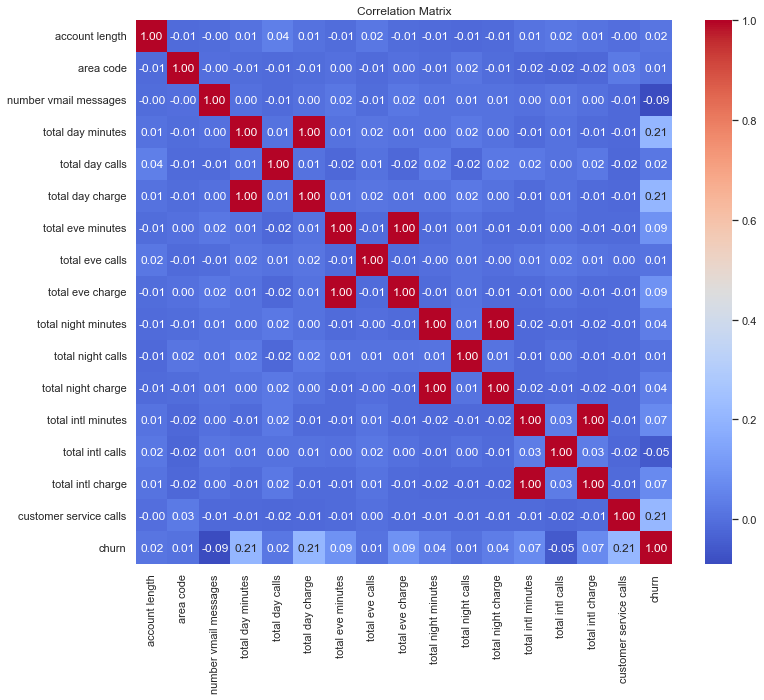

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Several features exhibit a perfect positive correlation, notably:

Total day charge and total day minutes

Total eve charge and total eve minutes

Total night charge and total night minutes

Total int charge and total int minutes

These perfect correlations are logical as the charge is a direct consequence of the minutes used.

## Checking Outliers

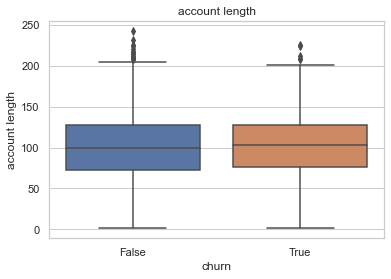

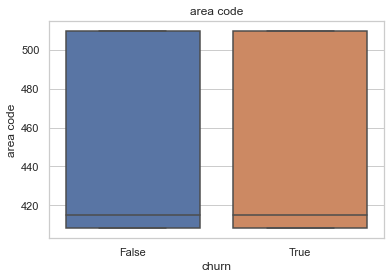

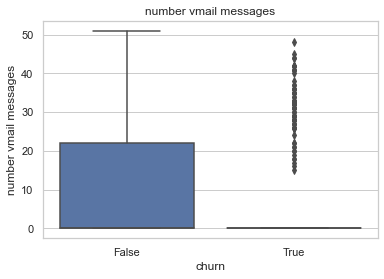

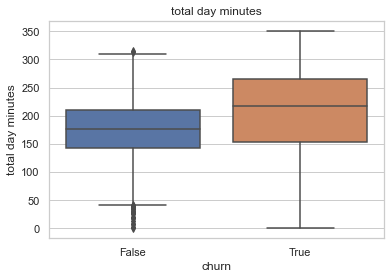

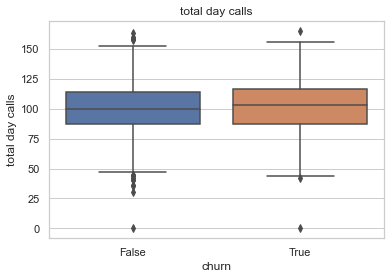

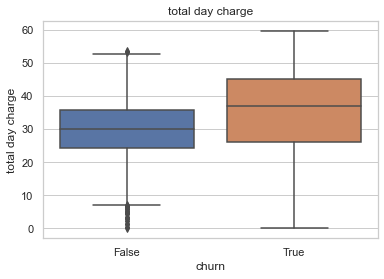

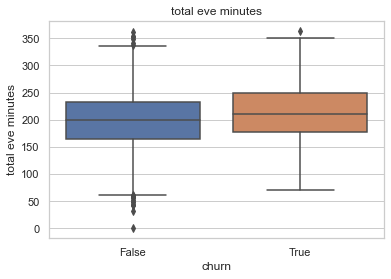

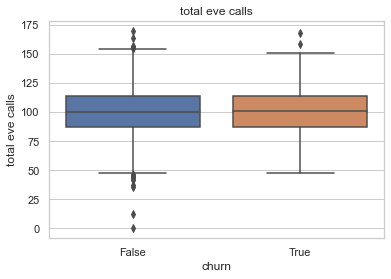

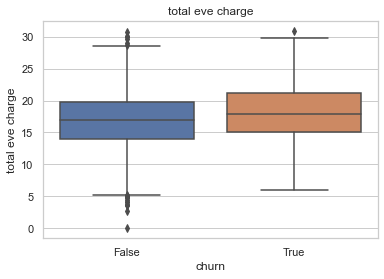

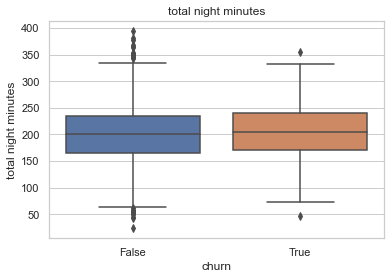

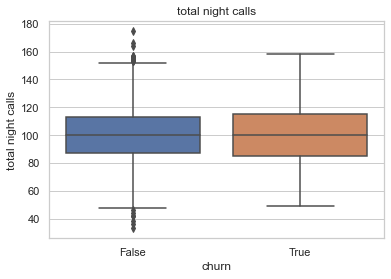

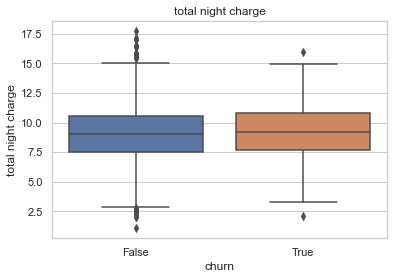

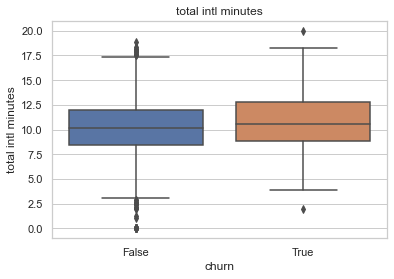

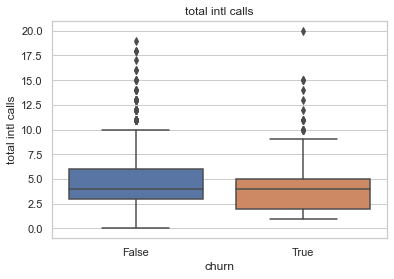

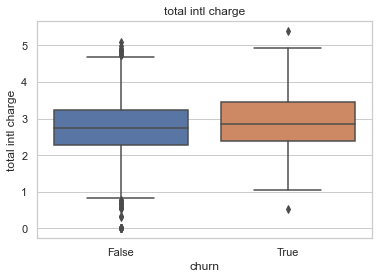

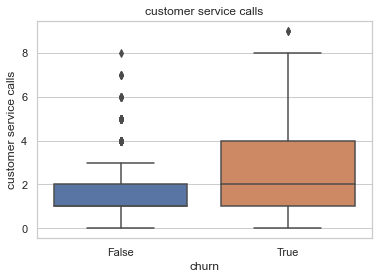

In [17]:
for feature in numerical_variables:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = df)
        plt.title(feature)
        plt.show()

In [18]:
class OutlierRemover:
    def __init__(self):
        pass
    
    def remove_outliers(self, train, labels):
        for label in labels:
            q1 = train[label].quantile(0.25)
            q3 = train[label].quantile(0.75)
            iqr = q3 - q1
            upper_bound = q3 + 1.5 * iqr
            lower_bound = q1 - 1.5 * iqr
            train[label] = train[label].mask(train[label] < lower_bound, train[label].median(), axis=0)
            train[label] = train[label].mask(train[label] > upper_bound, train[label].median(), axis=0)

        return train

# Example usage:
# Instantiate the OutlierRemover class
outlier_handler = OutlierRemover()

cleaned_data = outlier_handler.remove_outliers(df, numerical_variables)


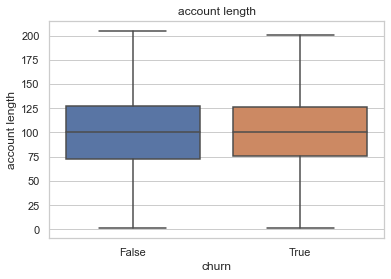

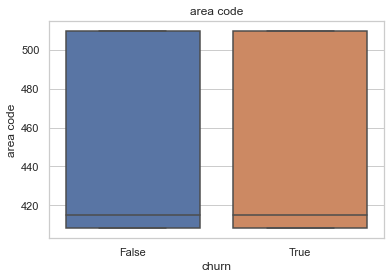

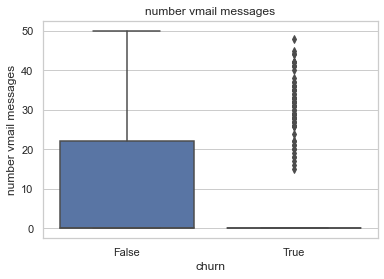

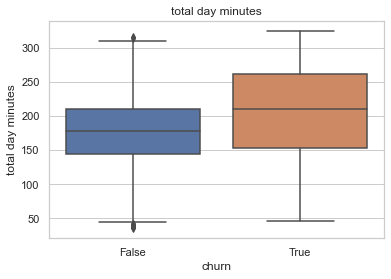

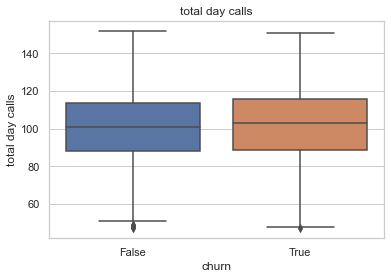

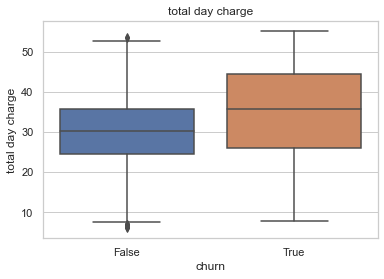

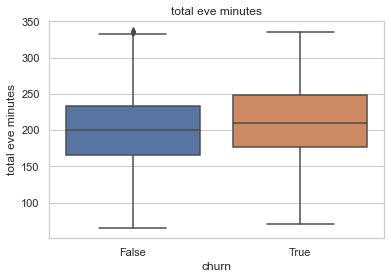

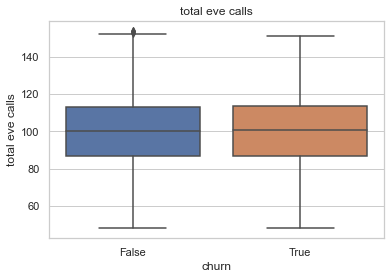

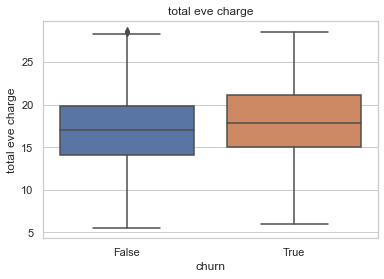

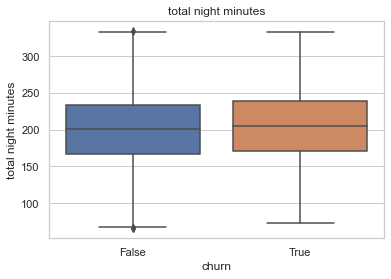

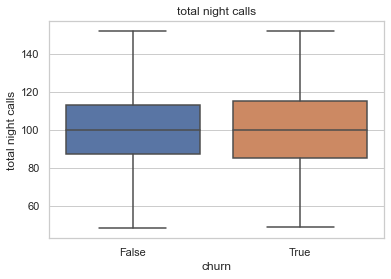

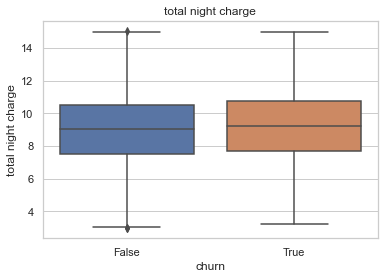

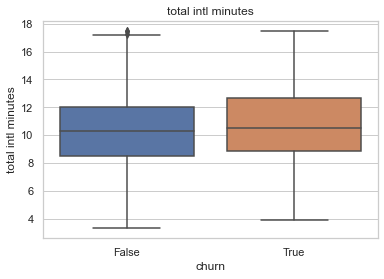

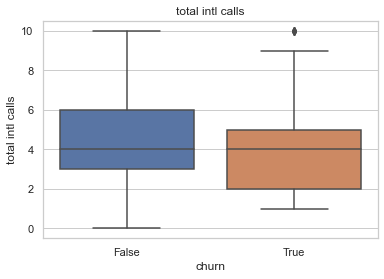

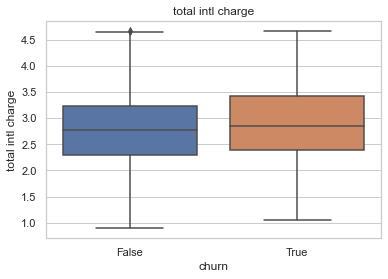

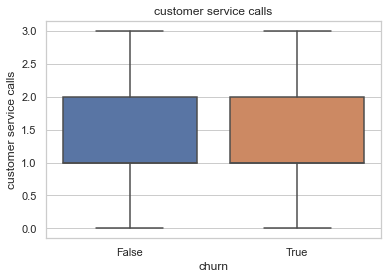

In [19]:
for feature in numerical_variables:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = df)
        plt.title(feature)
        plt.show()

## Data Preprocessing

In [20]:
# We take a preview of the unique values in the churn column - Target variable
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [21]:
# Convert the churn values to 0 and 1
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int') 
# Previewing the changes
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,201.4,88,17.12,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [22]:
# # Converting yes and no from columns to 0 and 1 
# Mapping dictionary
yes_no_to_binary = {'no': 0, 'yes': 1}

# Applying mapping to 'international plan' and 'voice mail plan'
df['international plan'] = df['international plan'].map(yes_no_to_binary)
df['voice mail plan'] = df['voice mail plan'].map(yes_no_to_binary)

In [23]:
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,201.4,88,17.12,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [31]:
# Encoding the state column
import category_encoders as ce

hash_encoder = ce.HashingEncoder(cols='state')

df = hash_encoder.fit_transform(df)


In [24]:
# Scaling the numerical columns
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,0.622549,0.068627,0.0,1.0,0.50,0.794199,0.600000,0.794231,0.487903,0.481132,0.487921,0.665428,0.413462,0.665289,0.471831,0.3,0.478836,0.333333,0.0
1,OH,0.519608,0.068627,0.0,1.0,0.52,0.436809,0.723810,0.436726,0.480938,0.518868,0.481018,0.701487,0.528846,0.701653,0.732394,0.3,0.743386,0.333333,0.0
2,NJ,0.666667,0.068627,0.0,0.0,0.00,0.719268,0.638095,0.719277,0.208578,0.584906,0.208369,0.360223,0.538462,0.360331,0.626761,0.5,0.634921,0.000000,0.0
3,OH,0.406863,0.000000,1.0,0.0,0.00,0.912638,0.228571,0.912655,0.502566,0.377358,0.502588,0.487732,0.394231,0.487603,0.232394,0.7,0.235450,0.666667,0.0
4,OK,0.362745,0.068627,1.0,0.0,0.00,0.454420,0.628571,0.454398,0.307918,0.698113,0.308024,0.450558,0.701923,0.450413,0.478873,0.3,0.486772,1.000000,0.0


## Modelling

In [35]:
# Splitting the data
X = df.drop(['churn'],axis=1)
y = df['churn']
# We use 25% of the data on testing and a random state of 42
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.25,random_state=42)

## Baseline Model

In [36]:
# We first begin by Logistic Regression as the baseline model

lr= LogisticRegression()
lr.fit(X_train,y_train) 
y_pred_lr = lr.predict(X_test) 

In [37]:
# Evaluating the baseline model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred_lr)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred_lr)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred_lr)))

Accuracy: 
0.8703481392557023
Classification report: 
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      2141
         1.0       0.68      0.18      0.29       358

    accuracy                           0.87      2499
   macro avg       0.78      0.58      0.61      2499
weighted avg       0.85      0.87      0.84      2499

Confusion Matrix
[[2110   31]
 [ 293   65]]


From the results of the baseline model, accuracy is at 87% which still has room for improvement

## Random Forest Classifier

In [43]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [44]:
# Evaluation of the 2nd model
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred_rfc)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred_rfc)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred_rfc)))

Accuracy: 
0.8939575830332133
Classification report: 
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      2141
         1.0       0.84      0.32      0.46       358

    accuracy                           0.89      2499
   macro avg       0.87      0.66      0.70      2499
weighted avg       0.89      0.89      0.87      2499

Confusion Matrix
[[2119   22]
 [ 243  115]]


In [46]:
# Tuning the Random Forest Classifier Model
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 5, 10, 15],   # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}
# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate model performance on test set
accuracy = best_estimator.score(X_test, y_test)


In [47]:
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8979591836734694


## XGB Classifier

In [50]:
clf = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.7, 
                        subsample=0.8, nthread=10, learning_rate=0.01)
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred_clf)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred_clf)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred_clf)))

Accuracy: 
0.9123649459783914
Classification report: 
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      2141
         1.0       0.85      0.47      0.61       358

    accuracy                           0.91      2499
   macro avg       0.88      0.73      0.78      2499
weighted avg       0.91      0.91      0.90      2499

Confusion Matrix
[[2111   30]
 [ 189  169]]
